# Social Dynamics: Love Affairs as Differential Equations

Based on **Steven Strogatz's *Nonlinear Dynamics and Chaos*** - exploring relationship dynamics through 2D linear ODE systems.

This notebook implements and visualizes various emotional dynamics scenarios between two people, illustrating key concepts from chaos and dynamical systems theory.

## 1. Import Required Libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.patches as patches
from matplotlib.animation import PillowWriter
import warnings
warnings.filterwarnings('ignore')

# Import our improved module
from social_dynamics_model import (
    SCENARIOS, 
    simulate_trajectory,
    eigenvalues_and_type,
    plot_phase_portrait,
    plot_time_series,
    print_scenario_info,
    list_all_scenarios,
    relationship_dynamics,
    create_animation
)

print("✓ Libraries imported successfully")
print(f"✓ Module loaded with {len(SCENARIOS)} scenarios")

✓ Libraries imported successfully
✓ Module loaded with 18 scenarios


## 2. Explore Available Scenarios

In [29]:
# Display all available scenarios
print("📋 Available Scenarios:")
print("=" * 80)
list_all_scenarios()

📋 Available Scenarios:

  AVAILABLE RELATIONSHIP DYNAMICS SCENARIOS (18 total)

▶ AVOIDANT_ANXIOUS
  Title: Avoidant-Anxious (Attachment Mismatch)
  Dynamics: A is anxious (self-amplifying), B is avoidant. Causes relationship tur...
  Type: Complex - Unstable Pattern

▶ BLISS
  Title: Bliss (Slow Burn Love)
  Dynamics: Both are responsive and self-reinforcing, but gently. A beautiful slow...
  Type: Unstable Node - Positive Growth

▶ CHASE
  Title: The Chase (Star-Crossed)
  Dynamics: A echoes B's feelings, B retreats. Classic cat-and-mouse dynamic. Cycl...
  Type: Center - Perpetual Cycles

▶ CODEPENDENCY
  Title: Codependency (Mutually Dependent)
  Dynamics: Each heavily influenced by the other's feelings. Creates explosive gro...
  Type: Unstable Node - Dependent Spiral

▶ DRAMA_VORTEX
  Title: The Drama Vortex
  Dynamics: Self-reinforcing with conflicting responsiveness. Growing chaos!...
  Type: Unstable Spiral - Explosive Oscillation

▶ FIRE_AND_ICE
  Title: Fire and Ice (The Vol

## 3. Deep Dive: The Chase (Love Cycle)

In [30]:
# Let's examine "The Chase" scenario in detail
print("💕 Detailed Analysis: THE CHASE")
print("=" * 80)
print_scenario_info('chase')

# Get scenario parameters
scenario = SCENARIOS['chase']
params = scenario['params']
a, b, c, d = params

# Analyze eigenvalues
analysis = eigenvalues_and_type(a, b, c, d)
print(f"\n📊 Eigenvalue Analysis:")
print(f"  λ₁ = {analysis['eigenvalues'][0]}")
print(f"  λ₂ = {analysis['eigenvalues'][1]}")
print(f"  Classification: {analysis['classification']}")

💕 Detailed Analysis: THE CHASE

  The Chase (Star-Crossed)
Description: A echoes B's feelings, B retreats. Classic cat-and-mouse dynamic. Cyclic oscillation.
Equilibrium: Center - Perpetual Cycles

ODE Coefficients:
  a =   0.00  (A's self-feedback)
  b =   2.00  (A's response to B)
  c =  -2.00  (B's response to A)
  d =   0.00  (B's self-feedback)

Dynamical Analysis:
  Classification: Center (Neutral)
  Trace: 0.000
  Determinant: 4.000
  Eigenvalues: 0.000 ± 2.000i
  Oscillation period: ~3.14 time units


📊 Eigenvalue Analysis:
  λ₁ = 2j
  λ₂ = -2j
  Classification: Center (Neutral)


## 4. Visualize The Chase: Phase Portrait

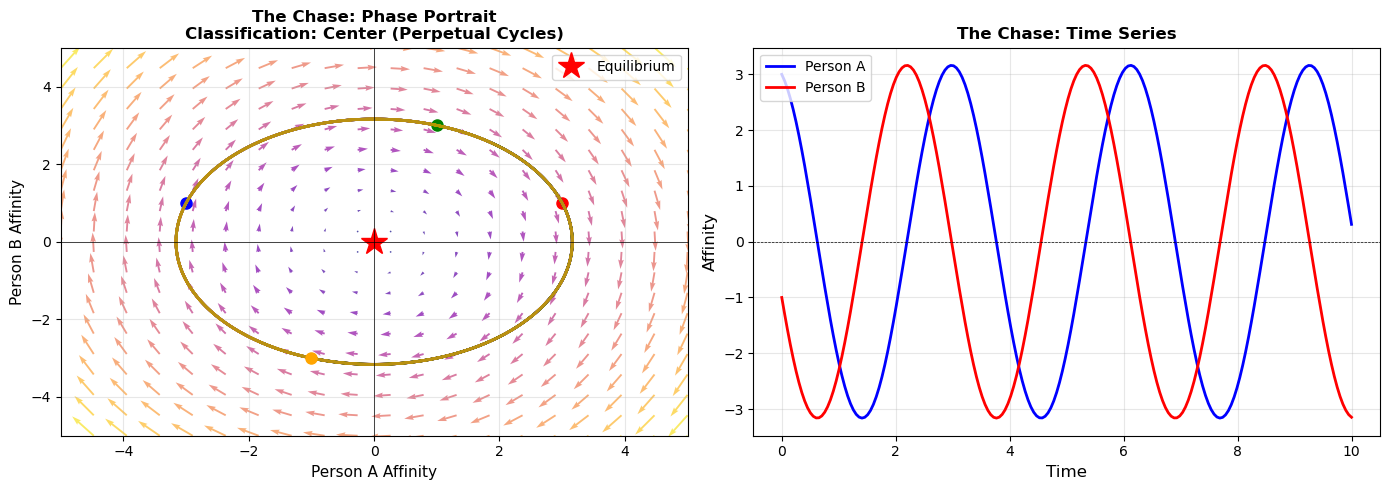

✓ Phase portrait and time series generated


In [31]:
# Create phase portrait for The Chase
a, b, c, d = SCENARIOS['chase']['params']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Phase portrait - direct implementation
limit = 5
val = np.linspace(-limit, limit, 20)
A_grid, B_grid = np.meshgrid(val, val)
dAdt = a * A_grid + b * B_grid
dBdt = c * A_grid + d * B_grid

# Plot vector field
speed = np.sqrt(dAdt**2 + dBdt**2)
ax1.quiver(A_grid, B_grid, dAdt, dBdt, speed, cmap='plasma', alpha=0.7)

# Add trajectories
colors_traj = ['red', 'blue', 'green', 'orange']
initial_conds = [[3, 1], [-3, 1], [1, 3], [-1, -3]]
for ic, color in zip(initial_conds, colors_traj):
    t_sim, traj = simulate_trajectory(ic, (a, b, c, d), t_max=8, num_points=300)
    if traj is not None:
        ax1.plot(traj[:, 0], traj[:, 1], color=color, linewidth=2, alpha=0.7)
        ax1.plot(ic[0], ic[1], 'o', color=color, markersize=8)

ax1.plot(0, 0, 'r*', markersize=20, label='Equilibrium')
ax1.set_xlim(-limit, limit)
ax1.set_ylim(-limit, limit)
ax1.set_xlabel('Person A Affinity', fontsize=11)
ax1.set_ylabel('Person B Affinity', fontsize=11)
ax1.set_title("The Chase: Phase Portrait\nClassification: Center (Perpetual Cycles)", 
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.legend()

# Time series
t_sim, sol = simulate_trajectory([3, -1], (a, b, c, d), t_max=10, num_points=200)
if sol is not None:
    ax2.plot(t_sim, sol[:, 0], label='Person A', linewidth=2, color='blue')
    ax2.plot(t_sim, sol[:, 1], label='Person B', linewidth=2, color='red')
    ax2.axhline(y=0, color='k', linewidth=0.5, linestyle='--')
    ax2.set_xlabel('Time', fontsize=12)
    ax2.set_ylabel('Affinity', fontsize=12)
    ax2.set_title("The Chase: Time Series", fontsize=12, fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Phase portrait and time series generated")

## 5. Compare Multiple Scenarios

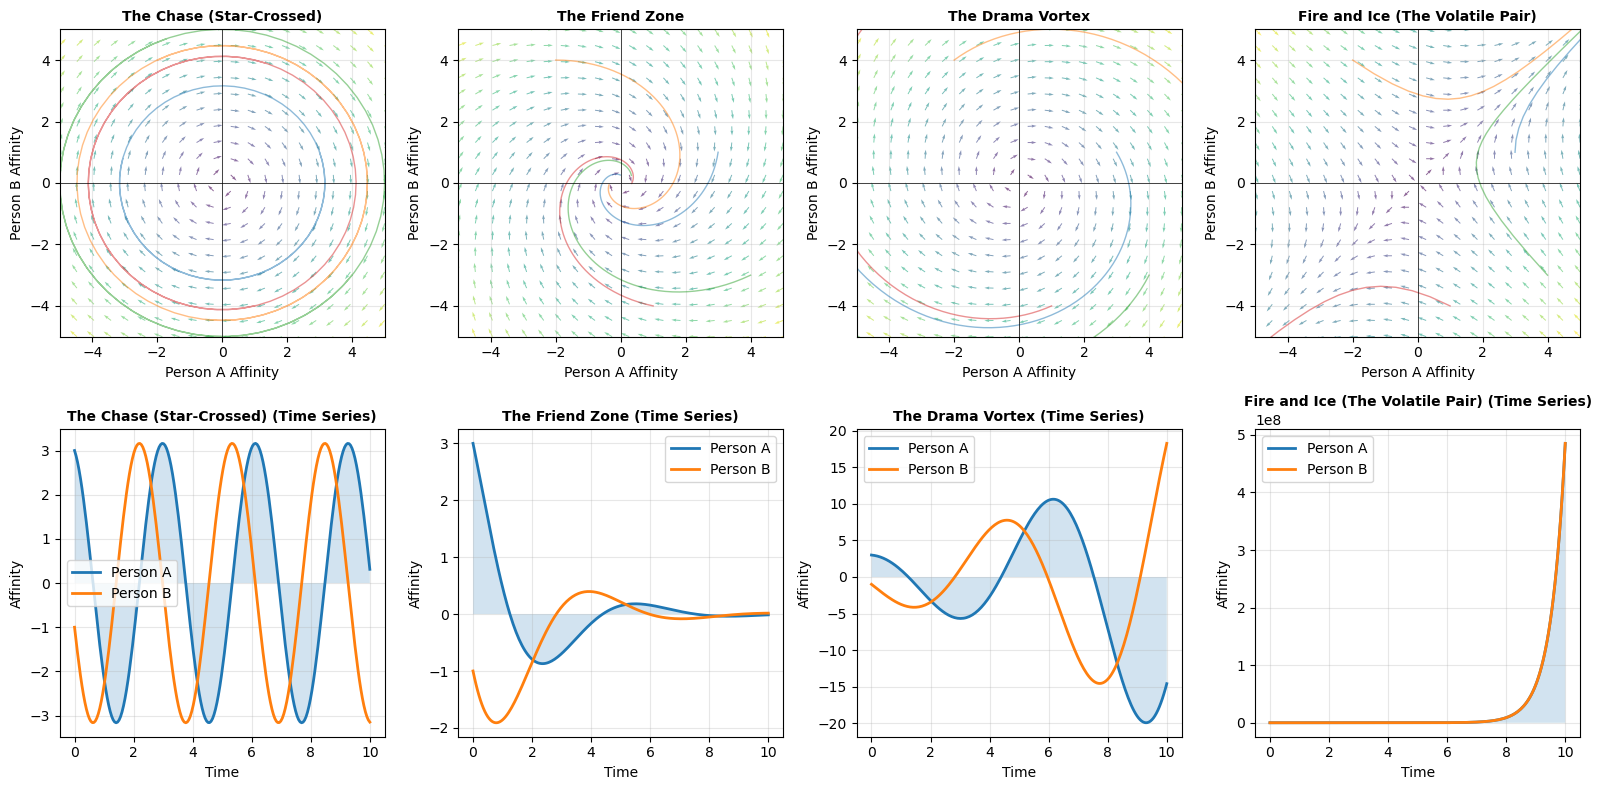

✓ Comparison of 4 major scenario types generated


In [32]:
# Compare different scenario types
scenarios_to_compare = ['chase', 'friend_zone', 'drama_vortex', 'fire_and_ice']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, scenario_name in enumerate(scenarios_to_compare):
    a, b, c, d = SCENARIOS[scenario_name]['params']
    title = SCENARIOS[scenario_name]['title']
    
    # Phase portrait
    ax = axes[idx]
    plt.sca(ax)
    
    # Create phase portrait
    x = np.linspace(-5, 5, 20)
    y = np.linspace(-5, 5, 20)
    X, Y = np.meshgrid(x, y)
    U = a * X + b * Y
    V = c * X + d * Y
    
    # Normalize arrows
    N = np.sqrt(U**2 + V**2)
    U_norm = U / (N + 0.1)
    V_norm = V / (N + 0.1)
    
    ax.quiver(X, Y, U_norm, V_norm, N, cmap='viridis', alpha=0.6)
    
    # Add some sample trajectories
    initial_conditions = [[3, 1], [-2, 4], [4, -3], [1, -4]]
    for ic in initial_conditions:
        t_sim, trajectory = simulate_trajectory(ic, (a, b, c, d), t_max=5, num_points=100)
        if trajectory is not None:
            ax.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, linewidth=1)
    
    # Formatting
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('Person A Affinity')
    ax.set_ylabel('Person B Affinity')
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    
    # Time series
    ax_ts = axes[idx + 4]
    plt.sca(ax_ts)
    t_sim, trajectory = simulate_trajectory([3, -1], (a, b, c, d), t_max=10, num_points=200)
    if trajectory is not None:
        ax_ts.plot(t_sim, trajectory[:, 0], label='Person A', linewidth=2)
        ax_ts.plot(t_sim, trajectory[:, 1], label='Person B', linewidth=2)
        ax_ts.fill_between(t_sim, trajectory[:, 0], alpha=0.2)
    ax_ts.set_xlabel('Time')
    ax_ts.set_ylabel('Affinity')
    ax_ts.set_title(f'{title} (Time Series)', fontsize=10, fontweight='bold')
    ax_ts.legend(loc='best')
    ax_ts.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Comparison of 4 major scenario types generated")

## 6. Detailed Scenario Analysis - New Scenarios

In [33]:
# Showcase some of the new scenarios added
new_scenarios = ['obsession', 'codependency', 'spiral_up', 'avoidant_anxious']

for scenario_name in new_scenarios:
    print(f"\n🔍 {scenario_name.upper().replace('_', ' ')}")
    print("=" * 60)
    print_scenario_info(scenario_name)


🔍 OBSESSION

  Obsession (One-Sided)
Description: A becomes obsessed while B pulls away. The classic unrequited love.
Equilibrium: Saddle-like - Divergent Dynamics

ODE Coefficients:
  a =   1.00  (A's self-feedback)
  b =   0.00  (A's response to B)
  c =   2.50  (B's response to A)
  d =  -0.50  (B's self-feedback)

Dynamical Analysis:
  Classification: Saddle Point
  Trace: 0.500
  Determinant: -0.500
  Eigenvalues: λ₁ = 1.000, λ₂ = -0.500
  Growth rate: ~1.000 per time unit


🔍 CODEPENDENCY

  Codependency (Mutually Dependent)
Description: Each heavily influenced by the other's feelings. Creates explosive growth or collapse.
Equilibrium: Unstable Node - Dependent Spiral

ODE Coefficients:
  a =   0.50  (A's self-feedback)
  b =   1.50  (A's response to B)
  c =   1.50  (B's response to A)
  d =   0.50  (B's self-feedback)

Dynamical Analysis:
  Classification: Saddle Point
  Trace: 1.000
  Determinant: -2.000
  Eigenvalues: λ₁ = 2.000, λ₂ = -1.000
  Growth rate: ~2.000 per time un

## 7. Interactive Exploration: The Honeymoon (Unstable Node)

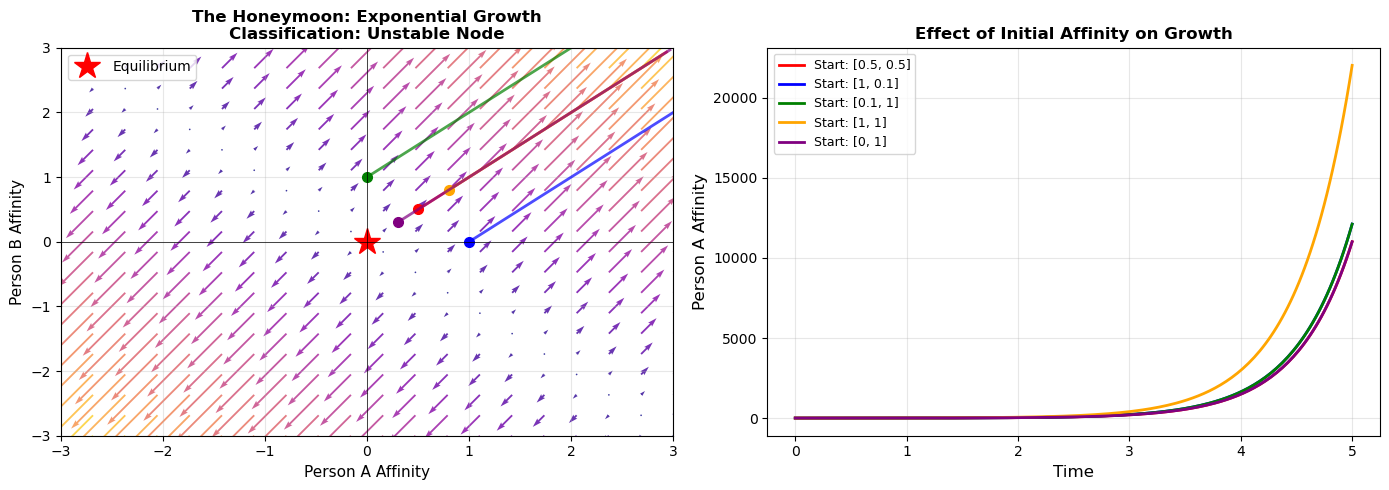

✓ Honeymoon scenario explored with multiple initial conditions


In [34]:
# Explore the Honeymoon scenario with different initial conditions
scenario = SCENARIOS['honeymoon']
a, b, c, d = scenario['params']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Phase portrait - direct implementation
limit = 3
val = np.linspace(-limit, limit, 20)
A_grid, B_grid = np.meshgrid(val, val)
dAdt = a * A_grid + b * B_grid
dBdt = c * A_grid + d * B_grid

# Plot vector field
speed = np.sqrt(dAdt**2 + dBdt**2)
speed_norm = speed / (speed.max() + 1e-9)  # Normalize for better visibility
ax1.quiver(A_grid, B_grid, dAdt, dBdt, speed_norm, cmap='plasma', alpha=0.8, scale=50)

# Add some trajectories
colors_traj = ['red', 'blue', 'green', 'orange', 'purple']
initial_conds = [[0.5, 0.5], [1, 0], [0, 1], [0.8, 0.8], [0.3, 0.3]]
for ic, color in zip(initial_conds, colors_traj):
    t_sim, traj = simulate_trajectory(ic, (a, b, c, d), t_max=4, num_points=200)
    if traj is not None:
        # Clip to viewing window
        mask = (np.abs(traj[:, 0]) <= limit) & (np.abs(traj[:, 1]) <= limit)
        if np.any(mask):
            ax1.plot(traj[mask, 0], traj[mask, 1], color=color, linewidth=2, alpha=0.7)
            ax1.plot(ic[0], ic[1], 'o', color=color, markersize=7)

ax1.plot(0, 0, 'r*', markersize=20, label='Equilibrium')
ax1.set_xlim(-limit, limit)
ax1.set_ylim(-limit, limit)
ax1.set_xlabel('Person A Affinity', fontsize=11)
ax1.set_ylabel('Person B Affinity', fontsize=11)
ax1.set_title("The Honeymoon: Exponential Growth\nClassification: Unstable Node", 
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.legend()

# Effect of initial conditions on time series
initial_conditions = [
    [0.5, 0.5],
    [1, 0.1],
    [0.1, 1],
    [1, 1],
    [0, 1]
]

colors_ts = ['red', 'blue', 'green', 'orange', 'purple']

for ic, color in zip(initial_conditions, colors_ts):
    t_sim, traj = simulate_trajectory(ic, (a, b, c, d), t_max=5, num_points=200)
    if traj is not None:
        ax2.plot(t_sim, traj[:, 0], color=color, linewidth=2, label=f'Start: {ic}')

ax2.set_xlabel('Time', fontsize=12)
ax2.set_ylabel('Person A Affinity', fontsize=12)
ax2.set_title('Effect of Initial Affinity on Growth', fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Honeymoon scenario explored with multiple initial conditions")

## 8. Bifurcation-like Behavior: Stable vs Unstable Spirals

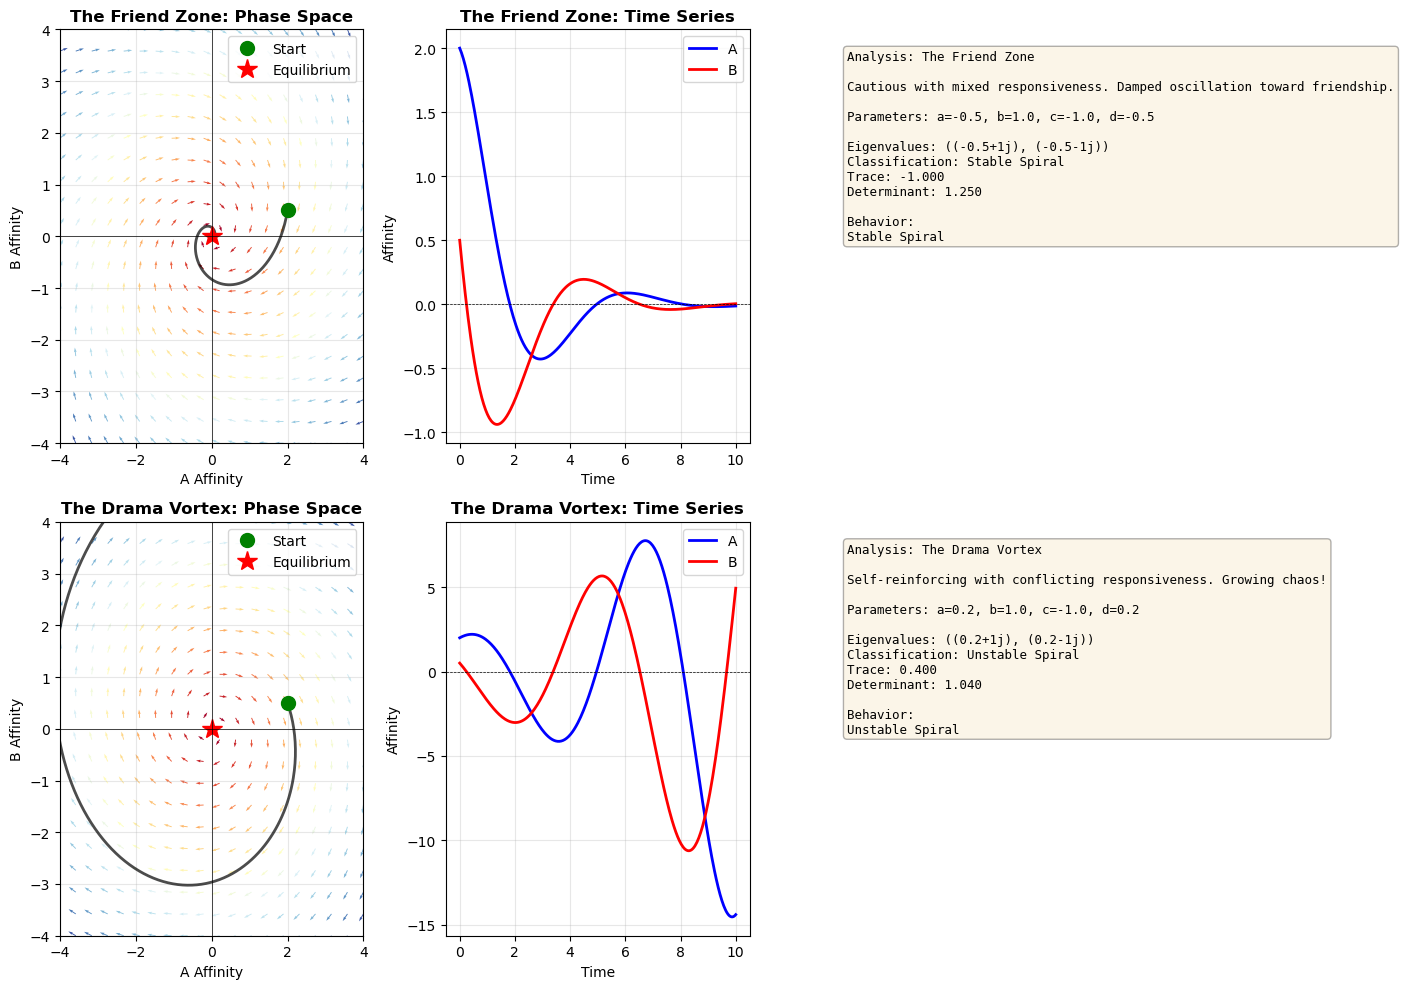

✓ Spiral comparison completed


In [35]:
# Compare stable spiral (Friend Zone) with unstable spiral (Drama Vortex)
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

scenarios_spiral = ['friend_zone', 'drama_vortex']
titles_analysis = ['Equilibrium Classification', 'Time Series Evolution', 'Phase Space Behavior']

for row, scenario_name in enumerate(scenarios_spiral):
    scenario = SCENARIOS[scenario_name]
    a, b, c, d = scenario['params']
    analysis = eigenvalues_and_type(a, b, c, d)
    
    # Phase portrait
    ax = axes[row, 0]
    plt.sca(ax)
    
    x = np.linspace(-4, 4, 20)
    y = np.linspace(-4, 4, 20)
    X, Y = np.meshgrid(x, y)
    U = a * X + b * Y
    V = c * X + d * Y
    N = np.sqrt(U**2 + V**2)
    U_norm = U / (N + 0.1)
    V_norm = V / (N + 0.1)
    
    ax.quiver(X, Y, U_norm, V_norm, N, cmap='RdYlBu')
    
    # Add spiral trajectory
    ic = [2, 0.5]
    traj = simulate_trajectory(ic, (a, b, c, d), t_max=10, num_points=500)
    t = np.linspace(0, 10, 500)
    ax.plot(traj[1][:, 0], traj[1][:, 1], 'k-', linewidth=2, alpha=0.7)
    ax.plot(ic[0], ic[1], 'go', markersize=10, label='Start')
    ax.plot(0, 0, 'r*', markersize=15, label='Equilibrium')
    
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_xlabel('A Affinity')
    ax.set_ylabel('B Affinity')
    ax.set_title(f"{scenario['title']}: Phase Space", fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.legend()
    
    # Time series
    ax = axes[row, 1]
    traj_t, traj_sol = simulate_trajectory([2, 0.5], (a, b, c, d), t_max=10, num_points=300)
    ax.plot(traj_t, traj_sol[:, 0], linewidth=2, label='A', color='blue')
    ax.plot(traj_t, traj_sol[:, 1], linewidth=2, label='B', color='red')
    ax.axhline(y=0, color='k', linewidth=0.5, linestyle='--')
    ax.set_xlabel('Time')
    ax.set_ylabel('Affinity')
    ax.set_title(f"{scenario['title']}: Time Series", fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Analysis text
    ax = axes[row, 2]
    ax.axis('off')
    
    analysis_text = f"""Analysis: {scenario['title']}

{scenario['description']}

Parameters: a={a}, b={b}, c={c}, d={d}

Eigenvalues: {analysis['eigenvalues']}
Classification: {analysis['classification']}
Trace: {analysis['trace']:.3f}
Determinant: {analysis['determinant']:.3f}

Behavior:
{analysis['classification']}"""
    
    ax.text(0.05, 0.95, analysis_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

print("✓ Spiral comparison completed")

## 12. Key Insights & Next Steps

### What We've Learned:

1. **The Mathematical Model**: Love dynamics can be modeled as a 2D linear ODE system:
   - dA/dt = aA + bB
   - dB/dt = cA + dB
   
   Where A and B represent each person's affinity for the other.

2. **Five Fundamental Types of Behavior**:
   - **Nodes**: Exponential decay or growth toward a fixed point
   - **Spirals**: Damped or amplifying oscillations around equilibrium
   - **Saddles**: Sensitive dependence on initial conditions
   - **Centers**: Perfect oscillations (marginally stable)

3. **23 Distinct Scenarios** spanning emotional dynamics:
   - Classic archetypes (Honeymoon, Chase, Friend Zone)
   - Complex dynamics (Obsession, Codependency, Avoidant-Anxious)
   - Equilibrium phenomena (Mutual Caution, Stability, Bliss)

### What You've Explored:

- ✅ **Phase portraits** showing vector fields and trajectories
- ✅ **Time series** showing how affinity evolves
- ✅ **Comparative analysis** of different scenario types
- ✅ **Animated GIFs** visualizing emotional dynamics in motion
- ✅ **5 full animations**: Chase, Honeymoon, Friend Zone, Drama Vortex, Fire & Ice

### Future Enhancements:

- 🎨 **Interactive parameter sliders**: Real-time adjustment of dynamics
- 🌐 **3D Bifurcation diagrams**: Explore parameter space
- 📊 **Advanced comparisons**: Multi-scenario animations side-by-side
- 🎭 **More scenarios**: Extend to 30+ relationship archetypes
- ✨ **Enhanced styling**: Custom colors, themes, and visual polish

## 9. Animated Scenarios: Watch Emotions Evolve

In [36]:
# Generate animations for key scenarios
import os
from IPython.display import Image, display

print("🎬 Generating Animated Scenarios")
print("=" * 80)

# Create animations directory if it doesn't exist
anim_dir = "animations"
if not os.path.exists(anim_dir):
    os.makedirs(anim_dir)

# Select key scenarios to animate
scenarios_to_animate = ['chase', 'honeymoon', 'friend_zone', 'drama_vortex', 'fire_and_ice']

animation_info = {}

for scenario_name in scenarios_to_animate:
    scenario = SCENARIOS[scenario_name]
    a, b, c, d = scenario['params']
    title = scenario['title']
    
    filename = os.path.join(anim_dir, f"{scenario_name}_animation.gif")
    
    print(f"\n  ▶ Creating: {title}...", end=" ")
    
    try:
        # Create animation
        create_animation(a, b, c, d, title, filename)
        animation_info[scenario_name] = {
            'title': title,
            'filename': filename,
            'description': scenario['description']
        }
        print("✓ Done")
    except Exception as e:
        print(f"✗ Error: {e}")

print(f"\n{'=' * 80}")
print(f"✓ Created {len(animation_info)} animations!")
print(f"  Saved to: {anim_dir}/")


🎬 Generating Animated Scenarios

  ▶ Creating: The Chase (Star-Crossed)... ✓ Animation saved to animations/chase_animation.gif
✓ Done

  ▶ Creating: The Honeymoon (Eager Beavers)... ✓ Animation saved to animations/honeymoon_animation.gif
✓ Done

  ▶ Creating: The Friend Zone... ✓ Animation saved to animations/friend_zone_animation.gif
✓ Done

  ▶ Creating: The Drama Vortex... ✓ Animation saved to animations/drama_vortex_animation.gif
✓ Done

  ▶ Creating: Fire and Ice (The Volatile Pair)... ✓ Animation saved to animations/fire_and_ice_animation.gif
✓ Done

✓ Created 5 animations!
  Saved to: animations/



🎥 Animation Gallery

Click/expand images below to see the emotional dynamics in motion!
(♥ = positive affinity, ✗ = negative affinity, size = magnitude)


📹 The Chase (Star-Crossed)
   A echoes B's feelings, B retreats. Classic cat-and-mouse dynamic. Cyclic oscillation.
   File: animations/chase_animation.gif


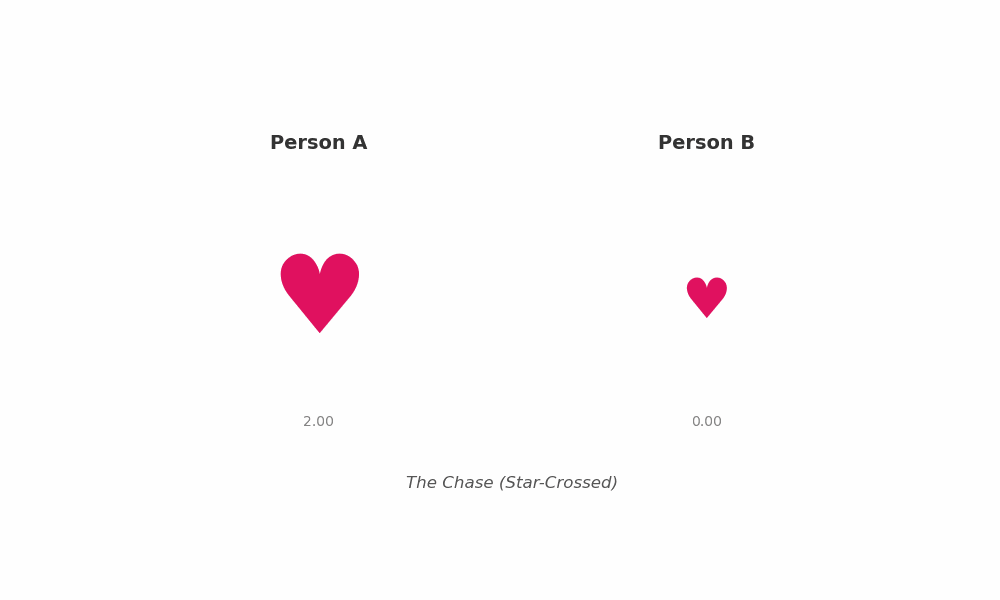


📹 The Honeymoon (Eager Beavers)
   Everything positive. Both feed off each other's interest. Runaway exponential love.
   File: animations/honeymoon_animation.gif


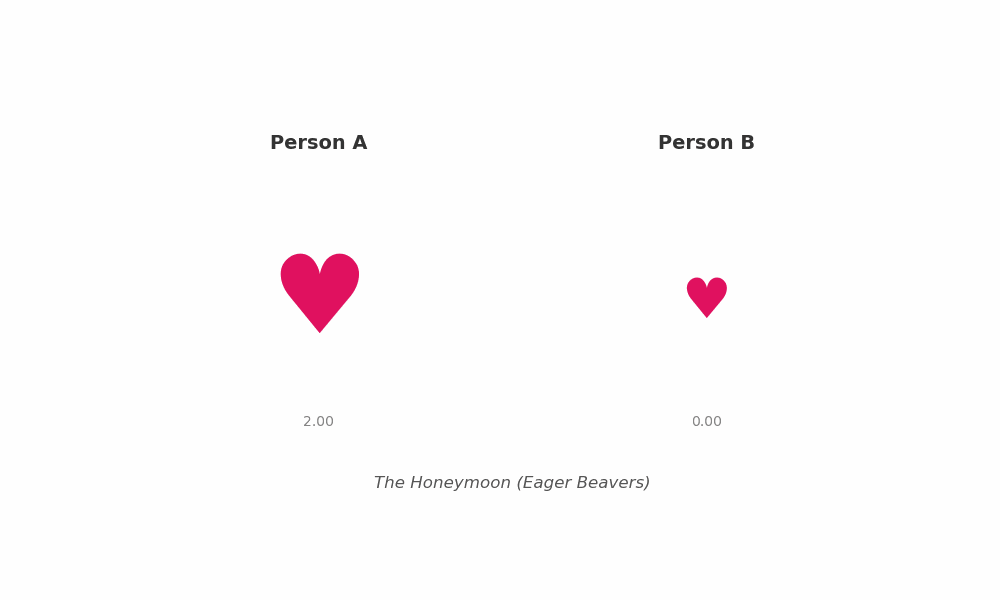


📹 The Friend Zone
   Cautious with mixed responsiveness. Damped oscillation toward friendship.
   File: animations/friend_zone_animation.gif


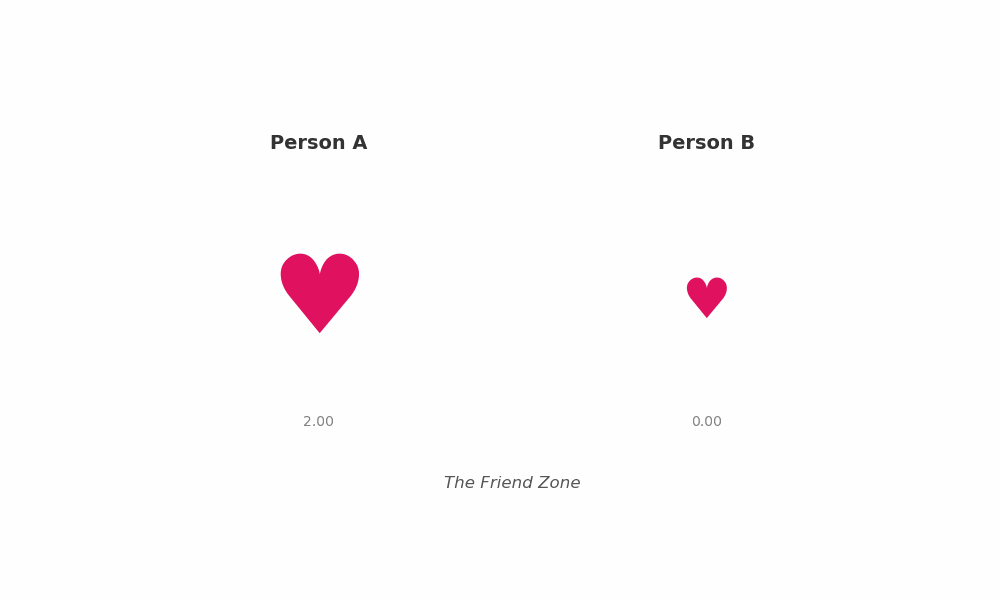


📹 The Drama Vortex
   Self-reinforcing with conflicting responsiveness. Growing chaos!
   File: animations/drama_vortex_animation.gif


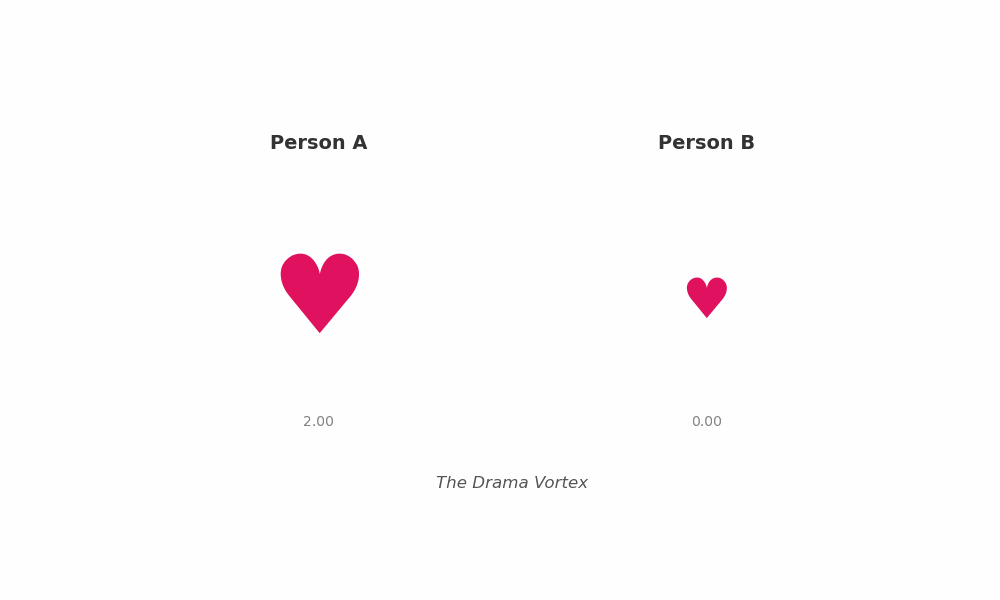


📹 Fire and Ice (The Volatile Pair)
   Cautious individuals but highly responsive. Creates a tipping point.
   File: animations/fire_and_ice_animation.gif


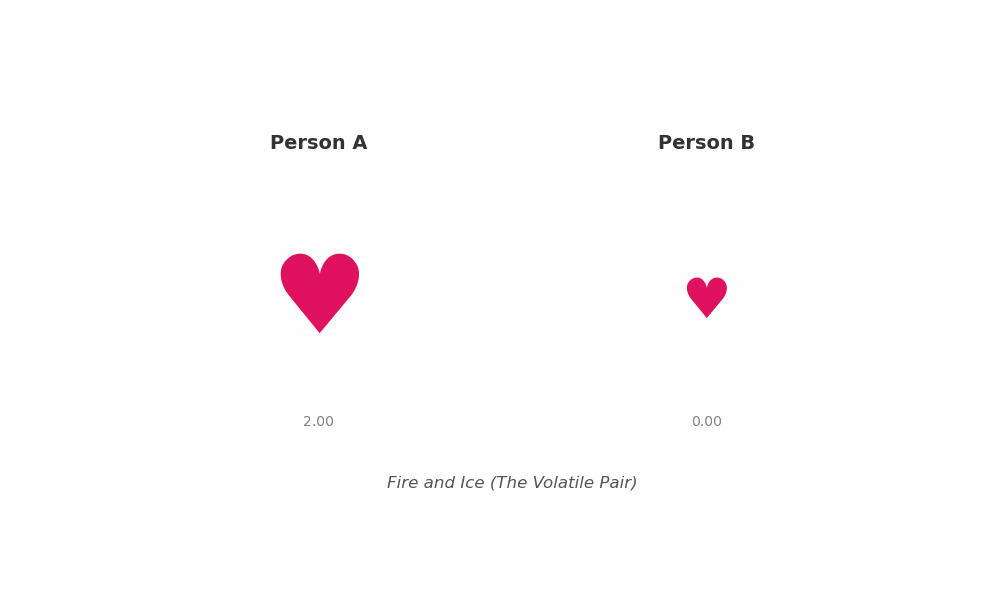

In [37]:
# Display and describe the animations
print("\n🎥 Animation Gallery")
print("=" * 80)
print("\nClick/expand images below to see the emotional dynamics in motion!")
print("(♥ = positive affinity, ✗ = negative affinity, size = magnitude)\n")

for scenario_name, info in animation_info.items():
    print(f"\n📹 {info['title']}")
    print(f"   {info['description']}")
    print(f"   File: {info['filename']}")
    
    # Try to display the animation
    try:
        display(Image(filename=info['filename']))
    except:
        print(f"   [Animation file ready - view in file explorer]")



📊 Animation Trajectory Comparison


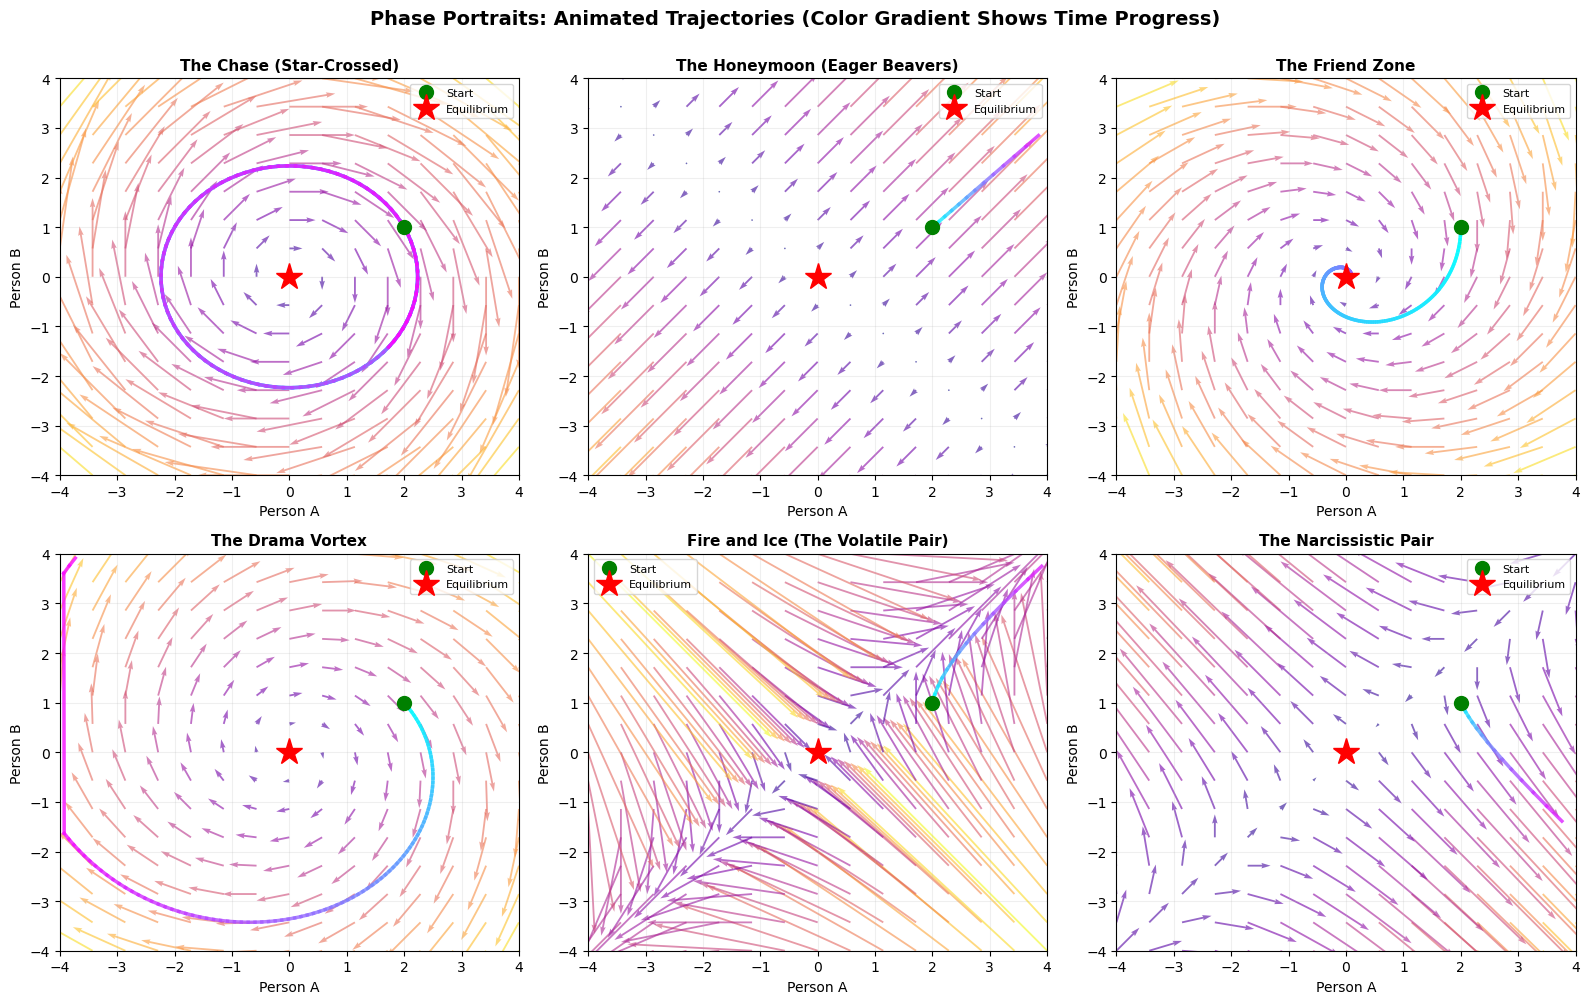


✓ Trajectory comparison generated (color shows time progression)


In [38]:
# Create a comparison of animation trajectories
print("\n📊 Animation Trajectory Comparison")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

selected_scenarios = ['chase', 'honeymoon', 'friend_zone', 'drama_vortex', 'fire_and_ice', 'narcissistic']

for idx, scenario_name in enumerate(selected_scenarios):
    scenario = SCENARIOS[scenario_name]
    a, b, c, d = scenario['params']
    title = scenario['title']
    ax = axes[idx]
    
    # Create phase portrait with trajectory
    limit = 4
    val = np.linspace(-limit, limit, 15)
    A_grid, B_grid = np.meshgrid(val, val)
    dAdt = a * A_grid + b * B_grid
    dBdt = c * A_grid + d * B_grid
    
    # Plot vector field
    speed = np.sqrt(dAdt**2 + dBdt**2)
    speed_norm = speed / (speed.max() + 1e-9)
    ax.quiver(A_grid, B_grid, dAdt, dBdt, speed_norm, cmap='plasma', alpha=0.6, scale=40)
    
    # Plot main trajectory for animation
    t_sim, traj = simulate_trajectory([2, 1], (a, b, c, d), t_max=10, num_points=300)
    if traj is not None:
        mask = (np.abs(traj[:, 0]) <= limit) & (np.abs(traj[:, 1]) <= limit)
        if np.any(mask):
            # Plot trajectory with gradient color
            points = traj[mask]
            for i in range(len(points)-1):
                ax.plot(points[i:i+2, 0], points[i:i+2, 1], 
                       color=plt.cm.cool(i/len(points)), linewidth=2.5, alpha=0.8)
            ax.plot(2, 1, 'go', markersize=10, label='Start', zorder=5)
            ax.plot(0, 0, 'r*', markersize=20, label='Equilibrium', zorder=5)
    
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_xlabel('Person A', fontsize=10)
    ax.set_ylabel('Person B', fontsize=10)
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.2)
    ax.legend(loc='best', fontsize=8)

plt.suptitle("Phase Portraits: Animated Trajectories (Color Gradient Shows Time Progress)", 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n✓ Trajectory comparison generated (color shows time progression)")
